Сразу импортируем необходимые библиотеки

In [3]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 20)  # None для вывода всех строк
pd.set_option('display.max_columns', 20)  # None для вывода всех столбцов/


Прочитаем наши данные 
##### Таблица с уникальными идентификаторами пользователей

In [9]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-kucherenko/Mini_project/olist_customers_dataset.csv',sep=',',encoding='Windows-1251')

##### Таблица заказов

In [10]:
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-kucherenko/Mini_project/olist_orders_dataset.csv',sep=',',encoding='Windows-1251')

##### Товарные позиции, входящие в заказы

In [11]:
order_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-kucherenko/Mini_project/olist_order_items_dataset.csv',sep=',',encoding='Windows-1251')

Посмотрим первые 5 строк

In [13]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [14]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


##### Выбор пользователей, которые совершили только один заказ и подсчет количества таких пользователей

Объединим таблицы клиентов и заказов

In [16]:
customers_and_orders = pd.merge(customers, orders, on = 'customer_id', how ='inner')

Покупкой будем считать заказ со статусом delivered. Объединяем таблицы

In [24]:
customers_and_orders = pd.merge(orders, customers, on='customer_id')

Фильтруем данные, оставляя только заказы со статусом "delivered"

In [25]:
customers_and_orders_sales = customers_and_orders.query("order_status == 'delivered'")

Подсчет количества заказов для каждого пользователя

In [18]:
order_counts = customers_and_orders_sales.groupby('customer_unique_id')['order_id'].nunique()

Вывод результата

In [19]:
single_order_users = order_counts[order_counts == 1].count()
print(single_order_users)

90557


##### Анализ недоставленных заказов

Фильтрация заказов, которые не были доставлены

In [39]:
customers_and_orders_delivered = customers_and_orders[customers_and_orders['order_status'] != 'delivered']

Преобразование столбца с датой заказа к типу datetime

In [40]:
customers_and_orders_delivered['order_purchase_timestamp'] = pd.to_datetime(customers_and_orders_delivered['order_purchase_timestamp'])

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Приведение даты к месяцу

In [41]:
customers_and_orders_delivered['order_month'] = customers_and_orders_delivered['order_purchase_timestamp'].dt.to_period('M')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Группировка данных по месяцу и статусу заказа, подсчет количества заказов

In [42]:
result = customers_and_orders_delivered.groupby(['order_month', 'order_status']).size().reset_index(name='order_count')

Вычисление среднего количества недоставленных заказов в месяц для каждой причины

In [43]:
average_monthly_order_count = result.groupby('order_status')['order_count'].mean().reset_index(name='average_order_count')

Вывод результата

In [44]:
avg_result

,order_status,average_order_count
0,approved,1.000000
1,canceled,26.041667
2,created,1.666667
3,invoiced,14.952381
4,processing,15.842105
5,shipped,48.130435
6,unavailable,29.000000


##### По каждому товару определим, в какой день недели товар чаще всего покупается

Получение объединенного датафрейма

In [46]:
full = pd.merge(customers_and_orders_sales,order_items, on = 'order_id', how = 'inner')

Преобразование столбца с датой заказа к типу datetime

In [47]:
full['order_purchase_timestamp'] = pd.to_datetime(full['order_purchase_timestamp'])

Получение столбца с днем недели

In [48]:
full['day_of_week'] = full['order_purchase_timestamp'].dt.dayofweek

Группировка по идентификатору продукта, находим количество покупок в каждый из дней недели

In [49]:
result = full.groupby(['product_id', 'day_of_week']).size().reset_index(name='purchase_count')

Получаем индексы строчек которые соответствуют максимальному количеству продаж в определенный день недели

In [50]:
idx = result.groupby('product_id')['purchase_count'].idxmax()

Ппределяем, в какой день недели товар чаще всего покупается

In [51]:
result_max = result.loc[idx]

Вывод результата

In [52]:
result_max

,product_id,day_of_week,purchase_count
0,00066f42aeeb9f3007548bb9d3f33c38,6,1
1,00088930e925c41fd95ebfe695fd2655,1,1
2,0009406fd7479715e4bef61dd91f2462,3,1
3,000b8f95fcb9e0096488278317764d19,2,1
5,000d9be29b5207b54e86aa1b1ac54872,1,1
...,...,...,...
59944,fff6177642830a9a94a0f2cba5e476d1,5,1
59946,fff81cc3158d2725c0655ab9ba0f712c,0,1
59947,fff9553ac224cec9d15d49f5a263411f,4,1
59948,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,2


#####  Определим сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)

Преобразование столбца с датой заказа к типу datetime

In [53]:
full['order_purchase_timestamp'] = pd.to_datetime(full['order_purchase_timestamp'])

Добавление столбцов для года и месяца

In [54]:
full['purchase_year'] = full['order_purchase_timestamp'].dt.year
full['purchase_month'] = full['order_purchase_timestamp'].dt.month

Группировка данных по пользователям, годам и месяцам для подсчета количества покупок

In [55]:
monthly_purchases = full.groupby(['customer_unique_id', 'purchase_year', 'purchase_month']).size().reset_index(name='purchase_count')

Добавление столбца с количеством дней в месяце

In [56]:
monthly_purchases['days_in_month'] = monthly_purchases.apply(
    lambda row: (pd.Timestamp(year=row['purchase_year'], month=row['purchase_month'], day=1) + pd.offsets.MonthEnd(1)).day, axis=1)

Вычисление количества недель в месяце

In [57]:
monthly_purchases['weeks_in_month'] = monthly_purchases['days_in_month'] / 7

Вычисление среднего количества покупок в неделю

In [58]:
monthly_purchases['avg_purchases_per_week'] = monthly_purchases['purchase_count'] / monthly_purchases['weeks_in_month']

Вывод результата

In [61]:
monthly_purchases

,customer_unique_id,purchase_year,purchase_month,purchase_count,days_in_month,weeks_in_month,avg_purchases_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018,5,1,31,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018,5,1,31,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017,3,1,31,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017,10,1,31,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017,11,1,30,4.285714,0.233333
...,...,...,...,...,...,...,...
95189,fffcf5a5ff07b0908bd4e2dbc735a684,2017,6,2,30,4.285714,0.466667
95190,fffea47cd6d3cc0a88bd621562a9d061,2017,12,1,31,4.428571,0.225806
95191,ffff371b4d645b6ecea244b27531430a,2017,2,1,28,4.000000,0.250000
95192,ffff5962728ec6157033ef9805bacc48,2018,5,1,31,4.428571,0.225806


##### Выполним когортный анализ пользователей

Находим первый заказ каждого пользователя

In [67]:
full['cohort_month'] = full.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

Строим когорты, группируя по дате первого заказа и дате повторного заказа

In [68]:
cohort_data = full.groupby(['cohort_month', full['order_purchase_timestamp'].dt.to_period('M')]).agg(
    n_customers=('customer_unique_id', 'nunique'),
    n_orders=('order_id', 'nunique')
).reset_index()

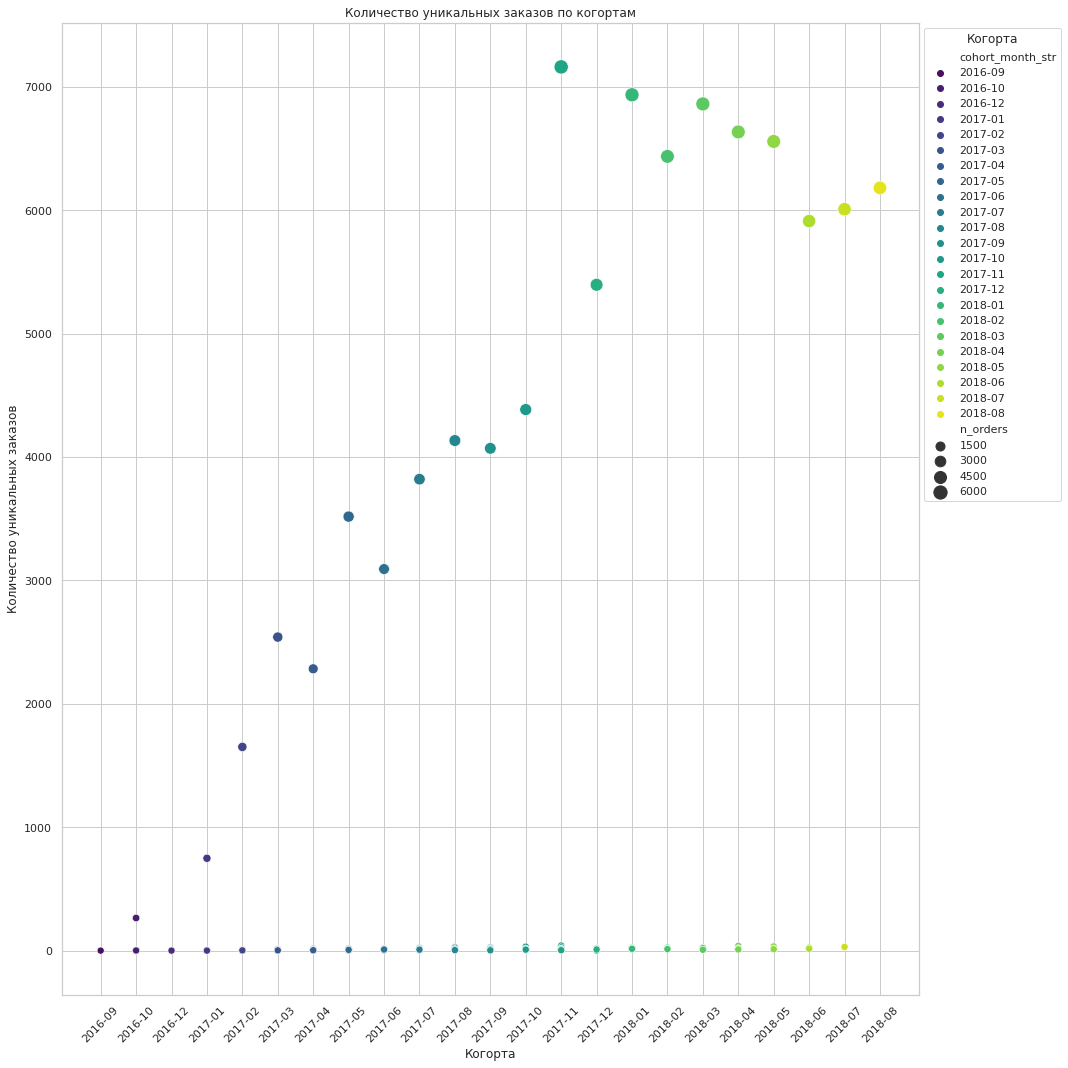

In [69]:
# Преобразование Period в строковый формат для оси x
cohort_data['cohort_month_str'] = cohort_data['cohort_month'].astype(str)

# Настройка стиля графика
sns.set(style='whitegrid')

# Создание фигуры и осей для графика
plt.figure(figsize=(15, 15))

# Построение точечной диаграммы (scatter plot)
sns.scatterplot(data=cohort_data, x='cohort_month_str', y='n_orders', hue='cohort_month_str', palette='viridis', size='n_orders', sizes=(50, 200))
plt.title('Количество уникальных заказов по когортам')
plt.xlabel('Когорта')
plt.ylabel('Количество уникальных заказов')
plt.xticks(rotation=45)
plt.legend(title='Когорта', loc='upper left', bbox_to_anchor=(1, 1)) 
plt.tight_layout()
plt.show()

Вычисляем разницу в месяцах между текущим месяцем заказа и месяцем когорты

In [70]:
cohort_data['diff'] = (cohort_data['order_purchase_timestamp'] - cohort_data['cohort_month']).apply(lambda x: x.n)

Преобразуем месяц когорты в формат datetime для дальнейшей фильтрации

In [71]:
cohort_data['cohort_month_str'] = pd.to_datetime(cohort_data['cohort_month_str'])

Фильтруем данные, чтобы оставить только третий месяц с момента первой покупки и когорты 2017 года

In [73]:
result = cohort_data.query("diff == 3 and cohort_month_str.dt.year == 2017")

Выводим результат

In [74]:
result

,cohort_month,order_purchase_timestamp,n_customers,n_orders,cohort_month_str,diff
15,2017-01,2017-04,1,1,2017-01-01,3
33,2017-02,2017-05,2,2,2017-02-01,3
51,2017-03,2017-06,10,12,2017-03-01,3
69,2017-04,2017-07,4,5,2017-04-01,3
86,2017-05,2017-08,10,10,2017-05-01,3
102,2017-06,2017-09,13,13,2017-06-01,3
117,2017-07,2017-10,9,9,2017-07-01,3
131,2017-08,2017-11,11,11,2017-08-01,3
144,2017-09,2017-12,11,15,2017-09-01,3
156,2017-10,2018-01,4,4,2017-10-01,3


##### Найдем в период с января по декабрь когорту с самым высоким retention на 3-й месяц

Скопируем датафрейм

In [75]:
df_2017 = full.copy()

Создание столбца для первого месяца покупки (cohort_month) для каждого клиента

In [76]:
df_2017['cohort_month'] = df_2017.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

Ограничение когорт только с января по декабрь 2017 года

In [77]:
df_2017 = df_2017[(df_2017['cohort_month'].dt.year == 2017) & (df_2017['cohort_month'].dt.month.between(1, 12))]

Подсчет общего числа клиентов в кажой когорт

In [78]:
cohort_data_2017 = df_2017.groupby('cohort_month')['customer_unique_id'].nunique().reset_index()
cohort_data_2017.columns = ['cohort_month', 'total_customers']

Создание столбца для месяца покупки

In [79]:
df_2017['purchase_month'] = df_2017['order_purchase_timestamp'].dt.to_period('M')

Создание индекса когорт

In [80]:
df_2017['cohort_index'] = (df_2017['purchase_month'] - df_2017['cohort_month']).apply(lambda x: x.n)

Подсчет удержанных клиентов на 3-й месяц от месяца когорты

In [81]:
retention_data = df_2017[df_2017['cohort_index'] == 3].groupby('cohort_month')['customer_unique_id'].nunique().reset_index()
retention_data.columns = ['cohort_month', 'retained_customers']

Объединение данных о когортах и их удержании

In [82]:
cohort_df = cohort_data_2017.merge(retention_data, on='cohort_month', how='left')

Заполнение пропусков нулями

In [83]:
cohort_df['retained_customers'] = cohort_df['retained_customers'].fillna(0)

Рассчет коэффициентов удержания

In [84]:
cohort_df['retention_rate'] = cohort_df['retained_customers'] / cohort_df['total_customers']

Перевод коэффициентов удержания в проценты

In [85]:
cohort_df['retention_rate_percent'] = cohort_df['retention_rate'] * 100

Нахождение когорты с наивысшим уровнем удержания на 3-й месяц

In [86]:
highest_retention_cohort = cohort_df.sort_values(by='retention_rate', ascending=False).iloc[0]['cohort_month']

Визуализация результатов с использованием тепловой карты

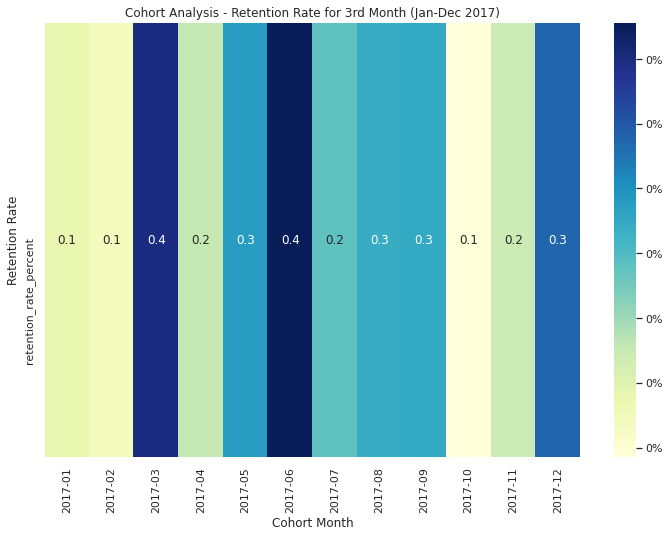

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_df.pivot_table(index='cohort_month', values='retention_rate_percent').T,
            annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'format': '%.0f%%'})
plt.title('Cohort Analysis - Retention Rate for 3rd Month (Jan-Dec 2017)')
plt.xlabel('Cohort Month')
plt.ylabel('Retention Rate')
plt.show()

Вывод результатов

In [88]:
print(f"Когорта с наивысшим уровнем удержания на 3-й месяц (Jan-Dec 2017): {highest_retention_cohort}")

Когорта с наивысшим уровнем удержания на 3-й месяц (Jan-Dec 2017): 2017-06


##### Построим RFM-сегментацию пользователей

Преобразование столбца с датами в формат datetime и Вычисление последней даты из датафрейма

In [95]:
full['order_purchase_timestamp'] = pd.to_datetime(full['order_purchase_timestamp'])
current_date = full['order_purchase_timestamp'].max() + pd.DateOffset(days=1)

Вычисляем целевые метрики для каждого уникального пользователя

In [96]:
rfm = full.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

In [97]:
rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

Проводим квантильную кластеризацию, вычисляем диапазоны значений

In [ ]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()

In [ ]:
quintiles

Пишем методы для присвоения рангов от 1 до 5. Меньшее значение Recency лучше, в то время как более высокие значения Frequency и Monetary лучше.

In [98]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5   

На основании квантилей присваиваем значения по шкале от 1 до 5 каждому уникальному клиенту

In [99]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

Компонуем значения R + F + M для получения RFM Score каждого клиента

In [100]:
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

У нас получается 50 сегментов разбитых по RFM_Score

In [101]:
rfm.groupby('RFM_Score').count().reset_index()

,RFM_Score,customer_unique_id,recency,frequency,monetary,R,F,M
0,111,3929,3929,3929,3929,3929,3929,3929
1,112,3684,3684,3684,3684,3684,3684,3684
2,113,3078,3078,3078,3078,3078,3078,3078
3,114,2861,2861,2861,2861,2861,2861,2861
4,115,2915,2915,2915,2915,2915,2915,2915
...,...,...,...,...,...,...,...,...
45,551,141,141,141,141,141,141,141
46,552,258,258,258,258,258,258,258
47,553,416,416,416,416,416,416,416
48,554,533,533,533,533,533,533,533


50 сегментов много для анализа, объединяем их в более понятные сегменты, как в примере. Часть категорий вылетает

In [112]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t lose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm


,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,1,1,411,promising
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,5,215,hibernating
...,...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,1,5,5,155,can't lose
93354,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,3,1,2,312,about to sleep
93355,ffff371b4d645b6ecea244b27531430a,568,1,89.90,1,1,3,113,hibernating
93356,ffff5962728ec6157033ef9805bacc48,119,1,115.00,4,1,4,414,promising


Выведем границ получившихся метрик

In [113]:
grouped = rfm.groupby('Segment').agg({
    'recency': ['min', 'max'],
    'frequency': ['min', 'max'],
    'monetary': ['min', 'max']
}).reset_index()

In [114]:
print(grouped)

           Segment recency      frequency     monetary          
                       min  max       min max      min       max
0   about to sleep     178  268         1   1     2.99   3690.00
1       can't lose     269  714         2  21     9.98  13440.00
2        champions       1   92         2  24     9.18   7160.00
3      hibernating     269  695         1   1     2.29   6735.00
4  loyal customers      93  268         2  20     7.80   3300.00
5    new customers       1   92         1   1     2.20   6729.00
6        promising      93  177         1   1     0.85   4099.99


Подготовим данные для визуализации

In [115]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

Построим график

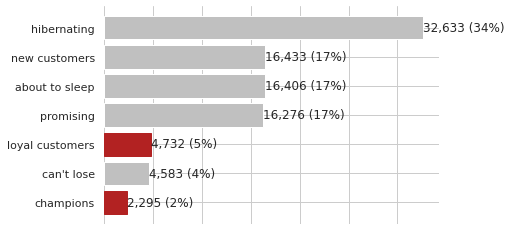

In [116]:
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)), segments_counts, color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False, bottom=False, labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
    value = bar.get_width()
    if segments_counts.index[i] in ['champions', 'loyal customers']:
        bar.set_color('firebrick')
    ax.text(value, bar.get_y() + bar.get_height()/2, '{:,} ({:}%)'.format(int(value), int(value*100/segments_counts.sum())), va='center', ha='left')

plt.show()

Наиболее важные клиенты для нас это loyal customers и champions, они составляют 7% наших пользователей.

Сгруппируем пользователей по частоте покупок и посмотрим сколько пользователей попало в каждую категорию.

In [118]:
rfm.groupby('frequency').count().reset_index()

,frequency,customer_unique_id,recency,monetary,R,F,M,RFM_Score,Segment
0,1,81748,81748,81748,81748,81748,81748,81748,81748
1,2,8797,8797,8797,8797,8797,8797,8797,8797
2,3,1646,1646,1646,1646,1646,1646,1646,1646
3,4,621,621,621,621,621,621,621,621
4,5,241,241,241,241,241,241,241,241
5,6,190,190,190,190,190,190,190,190
6,7,45,45,45,45,45,45,45,45
7,8,16,16,16,16,16,16,16,16
8,9,10,10,10,10,10,10,10,10
9,10,11,11,11,11,11,11,11,11
